# Explore and Plot the ATL06 data

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (12, 7), 'font.size': 10})

import hvplot
import hvplot.pandas
import geoviews as gv

In [2]:
%matplotlib inline

In [3]:
# os.listdir(f'/fs/project/howat.4/icesat2/antarctica_ATL06')

In [4]:
short_name = 'ATL06'
# region = 'rema_27_qml_south'#'rema_02_peninsula_north'
# icesat2_path = f'/fs/project/howat.4/icesat2/antarctica_{short_name}/{region}'
icesat2_path = f'/fs/project/howat.4/icesat2/antarctica_tiles_{short_name}'

files = os.listdir(f'{icesat2_path}')
# outline = gpd.read_file(f'{icesat2_path}/outline.shp')
# # outline = outline.to_crs({'init': 'epsg:4326'})
# outline.plot(alpha=.3);

In [5]:
shp_ext = 'shp' #'.gpkg'
hdf_files = [f for f in files if f.endswith('.h5')]
shp_files = [f for f in files if f.endswith(f'.{shp_ext}') and 'ATL06' in f]
csv_files = [f for f in files if f.endswith('.csv') and 'ATL06' in f]
# To pick the largest granule for visualization only
sz_list = [os.path.getsize(f'{icesat2_path}/{hdf}') for hdf in hdf_files]
idx = sz_list.index(max(sz_list)) #largest index
print(f'Count of shp files {len(shp_files)} and hdf = {len(hdf_files)}')

Count of shp files 65 and hdf = 65


In [6]:
# Analyze extracted Dates
ymd = [d.split('_')[2][:8] for d in shp_files]
ymd

In [7]:
ymd = pd.to_datetime(ymd)
ymd

DatetimeIndex(['2018-12-12', '2018-12-04', '2018-12-05', '2018-12-01',
               '2018-12-01', '2018-12-13', '2018-12-13', '2018-12-16',
               '2018-12-17', '2018-12-17', '2018-12-22', '2018-12-21',
               '2018-12-20', '2018-12-21', '2018-12-24', '2018-12-26',
               '2018-12-25', '2018-12-25', '2018-12-29', '2018-12-29',
               '2018-12-30', '2019-01-02', '2019-01-03', '2019-01-06',
               '2019-01-03', '2019-01-07', '2019-01-07', '2019-01-10',
               '2019-01-11', '2019-01-15', '2019-01-20', '2019-01-19',
               '2019-01-18', '2019-01-19', '2019-01-22', '2019-01-15',
               '2019-01-23', '2019-01-31', '2019-02-01', '2019-01-31',
               '2019-01-24', '2019-01-27', '2019-01-27', '2019-01-28',
               '2019-02-04', '2019-02-01', '2019-02-05', '2019-02-05',
               '2019-02-08', '2019-02-09', '2019-02-09', '2019-02-13',
               '2019-02-13', '2019-02-17', '2019-02-18', '2019-02-16',
      

In [8]:
ymd.min(), ymd.max()

(Timestamp('2018-12-01 00:00:00'), Timestamp('2019-02-26 00:00:00'))

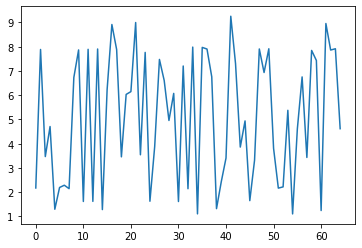

In [9]:
plt.plot([sz/1e6 for sz in sz_list]);

In [10]:
# idx = 4 #aside: choose here manually
fname = shp_files[idx].split(f'.{shp_ext}')[0]
fname

'processed_ATL06_20190127015226_04520211_003_01'

In [11]:
# Load ATL08 parsed data
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
gdf = gpd.read_file(f'{icesat2_path}/{fname}.{shp_ext}', parse_dates=True)
# Pick only the good quality data [verify if zero or one means good]
# df = df[df.q_flag==0]
# gdf = gdf[gdf.q_flag==0]

gtls = list(df.strip.unique())
print(len(df), gtls)
# gv.tile_sources.ESRI * gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=500, height=700, hover=['strip', 'h_te_media'])

40163 ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']


In [12]:
len(df)

40163

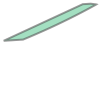

In [13]:
ch = gdf.geometry.unary_union.convex_hull
ch

In [15]:
# !echo $TMPDIR

In [16]:
y = gdf.geometry.unary_union.envelope
print(y)

POLYGON ((-66.27290002489215 -82.96600057640651, -63.32574519202058 -82.96600057640651, -63.32574519202058 -81.78575684848202, -66.27290002489215 -81.78575684848202, -66.27290002489215 -82.96600057640651))


In [17]:
x = gpd.GeoDataFrame([ch])

In [18]:
# x.hvplot(geo=True, color='strip', alpha=0.7, width=400, height=500)
type(x)

geopandas.geodataframe.GeoDataFrame

In [19]:
# import contextily as ctx

In [20]:
base = gv.tile_sources.ESRI

In [21]:
# base * gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=800, height=500)

In [32]:
# strips = gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=800, height=800)
terrain_scatter = df.hvplot(y='lat', x='h_li', kind='scatter', width=300, height=800, alpha=.7).relabel('terrain')

In [33]:
fig1 = base*strips + terrain_scatter

In [35]:
# hvplot.save(fig1, f'{icesat2_path}/{fname}.png')
# fig1

In [32]:
df.t_dt

0         2018-12-07 09:36:23.142
1         2018-12-07 09:36:23.144
2         2018-12-07 09:36:23.147
3         2018-12-07 09:36:23.150
4         2018-12-07 09:36:23.153
                   ...           
158979    2018-12-07 09:37:37.904
158980    2018-12-07 09:37:37.906
158981    2018-12-07 09:37:37.909
158982    2018-12-07 09:37:37.912
158983    2018-12-07 09:37:37.915
Name: t_dt, Length: 158984, dtype: object

In [33]:
df['t_dt'] = pd.to_datetime(df.t_dt)
df.t_dt

0        2018-12-07 09:36:23.142
1        2018-12-07 09:36:23.144
2        2018-12-07 09:36:23.147
3        2018-12-07 09:36:23.150
4        2018-12-07 09:36:23.153
                   ...          
158979   2018-12-07 09:37:37.904
158980   2018-12-07 09:37:37.906
158981   2018-12-07 09:37:37.909
158982   2018-12-07 09:37:37.912
158983   2018-12-07 09:37:37.915
Name: t_dt, Length: 158984, dtype: datetime64[ns]

In [34]:
df.head()

lon        lat       h_li  q_flag                    t_dt strip
0  82.270564 -86.187174  3225.9146       0 2018-12-07 09:36:23.142  gt1l
1  82.269159 -86.187025  3226.0576       0 2018-12-07 09:36:23.144  gt1l
2  82.267757 -86.186872  3226.0745       0 2018-12-07 09:36:23.147  gt1l
3  82.266357 -86.186705  3226.0960       0 2018-12-07 09:36:23.150  gt1l
4  82.264957 -86.186534  3226.1394       0 2018-12-07 09:36:23.153  gt1l

In [35]:
# df.hvplot(y='h_li', x='t_dt', by='strip', kind='scatter')

In [36]:
len(hdf_files)

107

In [37]:
import panel as pn
import xarray as xr
import hvplot.xarray
import cartopy.crs as ccrs

In [38]:
rasm = xr.tutorial.open_dataset('rasm').load()
method = rasm.mean(dim='time').hvplot.quadmesh
opts = dict(x='xc', y='yc', cmap='rainbow', coastline=True, geo=True)

In [39]:
pn.interact(lambda **kwargs: method(**kwargs, **opts), rasterize=True, project=True, projection=[ccrs.GOOGLE_MERCATOR, ccrs.Orthographic(90, 30)])

Column
    [0] Column
        [0] Checkbox(name='rasterize', value=True)
        [1] Checkbox(name='project', value=True)
        [2] Select(name='projection', options=[<cartopy.crs.Mercator obj...], value=<cartopy.crs.Mercator o...)
    [1] Row
        [0] HoloViews(DynamicMap, name='interactive03187')